In [1]:
# for mp neuron

In [4]:
# uploading the data u=in colab
# 1)directly upload
# 2 kaggle gives api
# 3 we can upload data in google drive

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("/content/drive/MyDrive/dataset/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# we need to visualise
data.describe()
# with this we can remove the entries which are not in the range as age cannot be 0 or 1000
# range of cholestrol is 80-150 .... we have some entries greater/less than the value we can update it
# feature is in character it will not describe
# to do this we have a data.info


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.info()
# to know the data types
# find missing values we have data.isna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
data.isna()
# to check the missing values

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data.isna().sum()
# to get the number we used aggregration function

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [15]:
# data is balanced or not :check
# balanced-- no of samples in 0 class or 1 class
# ex: 0-200 ,1-class:40 ---unbalanced

# in some cases we do change it to  the unbalanced (ex:brain tumour , we dont want to loose any patient i.e no patient having it is known to as healthy)

data["output"].value_counts()
# data is almost balanced ..if not we can use oversampling techinque to do it


1    165
0    138
Name: output, dtype: int64

In [16]:
x=data.drop("output",axis=1)
# feature matrix and target matrix


In [20]:
y=data["output"]

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0)

In [ ]:
# same model run multiple times it will give different accuracy in order to fix it we use random_state

In [27]:
print(ytrain.mean(),ytest.mean())

0.5374449339207048 0.5657894736842105


In [ ]:
# we need to ensure target and test must be similar
# stratify it will make both similar i.e ytrain and ytest

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,stratify=y)

In [29]:
print(ytrain.mean(),ytest.mean())

0.5462555066079295 0.5394736842105263


In [ ]:
# divide data in binary


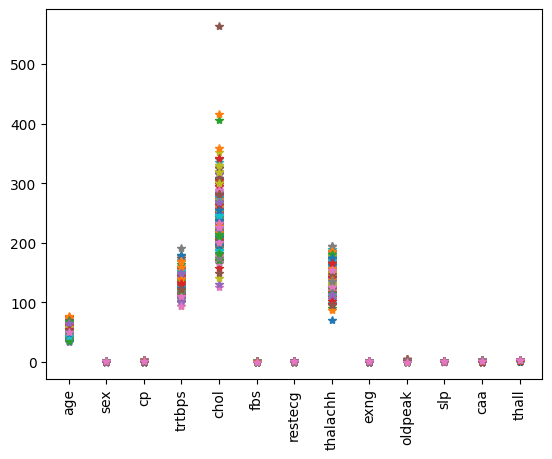

In [33]:
# transpose is T
plt.plot(xtrain.T,'*');
# to print vertically
plt.xticks(rotation='vertical');

In [34]:
# convert into 0 and 1 (training data)
# to remove the overlapping we will print vertically

In [44]:
# apply takes argument as a parameter
# pd.cut is applied for entire xtrain rows
# .values only count the values
xnewtrain=xtrain.apply(pd.cut,bins=2,labels=[0,1]).values
xnewtest=xtest.apply(pd.cut,bins=2,labels=[0,1]).values

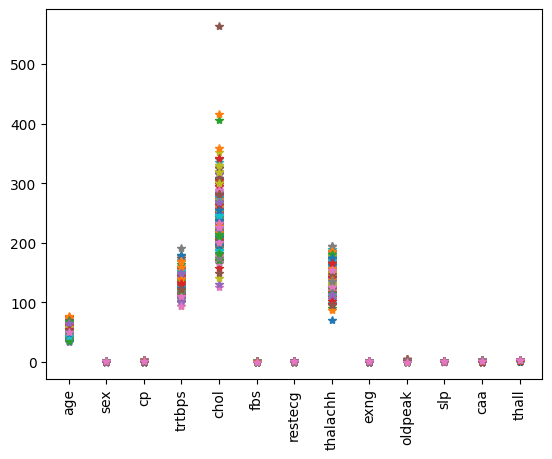

In [41]:
plt.plot(xtrain.T,'*')
plt.xticks(rotation='vertical');

In [46]:
for b in range(xtrain.shape[1]+1):
  acc_row=0
#  to count accurate rows
  y_pred=[]
  #  y predicted values

# model train karne ke liye x and y dono and while testing we want to give only x
  for x,y in zip(xnewtrain,ytrain):

    pred=np.sum(x>=b)
    y_pred.append(pred)
    acc_row+=y==pred
  print(b,acc_row/xtrain.shape[0])

  # model.fit we call it dont count the 1st row ..firstly we need to remove the headers of the file

0 0.0
1 0.00881057268722467
2 0.45374449339207046
3 0.45374449339207046
4 0.45374449339207046
5 0.45374449339207046
6 0.45374449339207046
7 0.45374449339207046
8 0.45374449339207046
9 0.45374449339207046
10 0.45374449339207046
11 0.45374449339207046
12 0.45374449339207046
13 0.45374449339207046


In [47]:
from sklearn.metrics import accuracy_score

In [50]:
# testing the data for b=5 to calculate the accuaracy of the model

b=5
y_pred=[]
for x in xnewtest:
  pred=np.sum(x>=b)
  y_pred.append(pred)
accuracy_score(ytest,y_pred)

0.4605263157894737

In [53]:
class MPNeuron:

  def __init__(self):
    self.b=None

  def model(self,x):
    return(sum(x) >= self.b)

  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y):
      accuracy={}

      for b in range(X.shape[1]+1):
        self.b=b
        Y_pred=self.predict(X)
        accuracy[b]=accuracy_score(Y_pred,Y)


      best_b=max(accuracy,key=accuracy.get)

      self.b=best_b

      print("optimal value of b is",best_b)
      print("Highest accuracy is",accuracy[best_b])

In [55]:
mp_neuron=MPNeuron()
mp_neuron.fit(xnewtrain,ytrain)

optimal value of b is 0
Highest accuracy is 0.5462555066079295


In [57]:
Y_test_pred=mp_neuron.predict(xnewtest)
accuracy_test=accuracy_score(Y_test_pred,ytest)
print(accuracy_test)

0.5394736842105263
